# PRISM Normals: 1981-2010

Process the PRISM normals for area-weighted watershed values

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Process_Events'
PRE_XLSX = "PRISM_AnnMaxSummary.xlsx"
TMAX_XLSX = "PRISM_TMax_AnnSummary.xlsx"
TMIN_XLSX = "PRISM_TMin_AnnSummary.xlsx"
IN_SHT = "Pandas_Out"

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

## Load the Worksheets

### Precip

In [5]:
InFile = os.path.normpath( os.path.join( IN_DIR, PRE_XLSX ) )
PreDF = pd.read_excel( InFile, sheet_name=IN_SHT, header=0, index_col=0, parse_dates=True )

In [7]:
display( HTML( PreDF.head().to_html() ) )

,Year,Month,Day of Year,WS_Val_mm,Daily_Max
Date,,,,,
1981-01-01,1981,1,1,0.0,0.0
1981-01-02,1981,1,2,0.0,0.0
1981-01-03,1981,1,3,0.0,0.0
1981-01-04,1981,1,4,0.0,0.0
1981-01-05,1981,1,5,0.0,0.0


In [8]:
PreDF.drop( columns=["Year", "Month", "Day of Year", "Daily_Max"], inplace=True )

In [9]:
PreDF.columns = [ "Pre_WS_mm" ]

In [10]:
MonPreDF = PreDF.resample( 'MS', closed='left', label='left' ).sum() 

In [11]:
display( HTML( MonPreDF.head().to_html() ) )

,Pre_WS_mm
Date,
1981-01-01,18.677666
1981-02-01,7.856942
1981-03-01,57.550767
1981-04-01,121.607205
1981-05-01,63.311645


In [12]:
MonPreDF["Month"] = MonPreDF.index.month
MonPreDF["Year"] = MonPreDF.index.year

In [13]:
PVPre = pd.pivot_table( MonPreDF, values='Pre_WS_mm', index='Year', 
                        columns='Month', aggfunc=np.mean )

In [14]:
display( HTML( PVPre.to_html() ) )

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1981,18.677666,7.856942,57.550767,121.607205,63.311645,130.743354,7.319062,71.792409,26.402244,175.553436,0.854542,0.000000
1982,9.888207,62.943941,3.466829,15.173483,86.773904,71.764534,27.310729,9.670523,14.632982,5.905209,38.726731,30.808937
1983,31.688014,36.082224,19.186569,4.444815,42.794025,81.831799,2.572314,34.662584,29.437302,108.806304,36.289381,0.001219
1984,36.788953,7.769229,6.403553,3.943316,21.590164,29.533680,37.904000,4.178947,51.321917,65.511511,50.659982,90.040861
1985,39.146484,18.132801,34.604161,20.303424,44.800808,92.159175,34.805316,0.974751,61.477166,30.494937,20.637603,0.002950
1986,11.711490,13.568747,9.177470,15.509503,115.275174,60.136867,10.558247,71.358788,58.291350,188.837827,28.160343,67.657407
1987,5.446547,54.744065,27.454344,47.515776,83.290965,127.744592,36.827283,63.821627,37.747158,5.060127,21.079790,19.184727
1988,0.966812,3.369943,3.262538,8.359243,73.187251,52.075313,91.277925,26.895798,115.523345,5.427286,0.741700,9.954907
1989,32.245070,67.997027,33.310284,7.134909,47.649759,25.688501,0.567298,3.355332,35.926999,63.047320,19.234125,8.238520


In [15]:
PreDesc = PVPre.describe()

In [16]:
PreDesc

Month,1,2,3,4,5,6,7,8,9,10,11,12
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,21.801931,27.519264,38.749334,36.814617,61.784283,66.442672,47.338690,54.554215,60.554779,65.148089,31.061979,19.068374
std,19.259155,26.007884,33.277504,36.431583,42.086562,49.115569,47.898505,59.177738,48.776989,67.171443,32.610681,24.168809
min,0.000000,0.487687,2.172183,1.082273,11.356880,0.256208,0.567298,0.007556,2.578322,0.731484,0.000000,0.000000
25%,3.270743,7.858754,19.199050,12.137445,31.119745,29.981691,12.898291,13.185600,28.060461,9.666829,2.761970,3.957461
50%,16.465175,17.631331,33.424272,25.143384,48.445618,53.078062,35.521338,39.390115,49.298701,45.218327,22.280262,10.834586
75%,36.946848,36.857259,53.588137,47.006278,81.909308,94.739968,62.149093,71.684004,66.685242,99.073665,41.822348,19.438570
max,66.740080,87.918608,140.590137,146.672400,187.480704,197.880177,211.667838,286.079180,196.246997,224.143276,133.097694,90.040861


In [17]:
PreDesc.at["mean", 1]

21.801931446464383

In [18]:
# output to a pickle for later
OutFP = os.path.normpath( os.path.join( OUT_DIR, "PRISM_WS_MonPrecip_PT.pickle") )
with open( OutFP, 'wb' ) as OP:
    pickle.dump( PVPre, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [19]:
# output to a pickle for later
OutFP = os.path.normpath( os.path.join( OUT_DIR, "PRISM_WS_MonPrecip_Desc.pickle") )
with open( OutFP, 'wb' ) as OP:
    pickle.dump( PreDesc, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [20]:
PreMonAve = PreDesc.loc["mean"].to_numpy()
PreMonStd = PreDesc.loc["std"].to_numpy()
type(PreMonAve)

numpy.ndarray

In [21]:
PreMonAve

array([21.80193145, 27.51926443, 38.74933378, 36.81461716, 61.78428305,
       66.44267167, 47.33868988, 54.55421518, 60.55477942, 65.14808925,
       31.06197874, 19.06837446])

In [22]:
AnnAvePre = PreMonAve.sum()
AnnAvePre

530.8382284512818

### TMax

In [23]:
InFile = os.path.normpath( os.path.join( IN_DIR, TMAX_XLSX ) )
TMaxDF = pd.read_excel( InFile, sheet_name=IN_SHT, header=0, index_col=0, parse_dates=True )

In [24]:
TMaxDF.drop( columns=["Year", "Month", "Day of Year"], inplace=True )

In [25]:
TMaxDF.columns = [ "Tmax_WS_C" ]

In [26]:
MonTMaxDF = TMaxDF.resample( 'MS', closed='left', label='left' ).mean() 

In [27]:
MonTMaxDF["Month"] = MonTMaxDF.index.month
MonTMaxDF["Year"] = MonTMaxDF.index.year

In [28]:
PVTMax = pd.pivot_table( MonTMaxDF, values='Tmax_WS_C', index='Year', 
                         columns='Month', aggfunc=np.mean )

In [29]:
TMaxDesc = PVTMax.describe()

In [30]:
# output to a pickle for later
OutFP = os.path.normpath( os.path.join( OUT_DIR, "PRISM_WS_MonTMax_PT.pickle") )
with open( OutFP, 'wb' ) as OP:
    pickle.dump( PVTMax, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [31]:
# output to a pickle for later
OutFP = os.path.normpath( os.path.join( OUT_DIR, "PRISM_WS_MonTMax_Desc.pickle") )
with open( OutFP, 'wb' ) as OP:
    pickle.dump( TMaxDesc, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [32]:
TMaxMonAve = TMaxDesc.loc["mean"].to_numpy()

In [33]:
TMaxMonAve

array([16.17969655, 18.68538442, 22.86717385, 27.290896  , 30.98668933,
       33.74829027, 34.91710923, 35.21628636, 31.8851898 , 26.77812592,
       21.02442938, 16.38213996])

### TMin

In [34]:
InFile = os.path.normpath( os.path.join( IN_DIR, TMIN_XLSX ) )
TMinDF = pd.read_excel( InFile, sheet_name=IN_SHT, header=0, index_col=0, parse_dates=True )

In [35]:
TMinDF.drop( columns=["Year", "Month", "Day of Year"], inplace=True )

In [36]:
TMinDF.columns = [ "TMin_WS_C" ]

In [37]:
MonTMinDF = TMinDF.resample( 'MS', closed='left', label='left' ).mean() 

In [38]:
MonTMinDF["Month"] = MonTMinDF.index.month
MonTMinDF["Year"] = MonTMinDF.index.year

In [39]:
PVTMin = pd.pivot_table( MonTMinDF, values='TMin_WS_C', index='Year', 
                         columns='Month', aggfunc=np.mean )

In [40]:
TMinDesc = PVTMin.describe()

In [41]:
# output to a pickle for later
OutFP = os.path.normpath( os.path.join( OUT_DIR, "PRISM_WS_MonTMin_PT.pickle") )
with open( OutFP, 'wb' ) as OP:
    pickle.dump( PVTMin, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [42]:
# output to a pickle for later
OutFP = os.path.normpath( os.path.join( OUT_DIR, "PRISM_WS_MonTMin_Desc.pickle") )
with open( OutFP, 'wb' ) as OP:
    pickle.dump( TMinDesc, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

In [43]:
TMinMonAve = TMinDesc.loc["mean"].to_numpy()

In [44]:
TMinMonAve

array([ 0.65386177,  2.95516437,  7.2935852 , 11.97256245, 17.45692814,
       21.01613048, 22.29067888, 21.91320977, 18.36598193, 12.91604736,
        6.35425407,  1.02257406])

## Plots

In [90]:
DR_AveETo = [ 62.738, 76.454, 120.904, 152.654, 177.292, 188.214, 192.278, 188.214, 
              146.558, 110.49, 73.914, 59.944 ]

In [91]:
bWidth = 0.30

In [92]:
monTicks = [x for x in range(1, 13, 1)]
monTLabels = [ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [93]:
pmonTicks = [ ( x - ((0.5 * bWidth) + 0.05) ) for x in monTicks ]
emonTicks = [ ( x + ((0.5 * bWidth) + 0.05) ) for x in monTicks ]

In [94]:
preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
tmpTicks = [ 0.0 + (x *5.0) for x in range(9) ]

In [95]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "PRISM_Normals_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\PRISM_Normals_1981-2010.svg'

In [96]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "PRISM_Normals_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\PRISM_Normals_1981-2010.png'

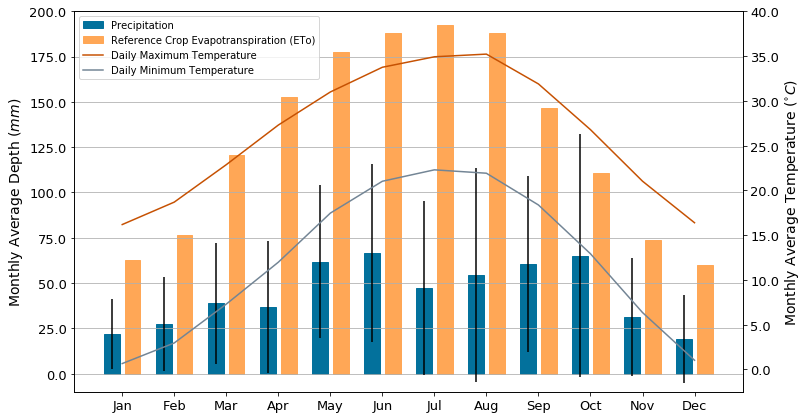

In [100]:
Fig1 = plt.figure()
Fig1.set_size_inches(12.0, 7.0)
ax11 = Fig1.add_subplot(111)
preRects = ax11.bar( pmonTicks, PreMonAve, bWidth, yerr=PreMonStd, 
                     color='xkcd:ocean blue', edgecolor='xkcd:ocean blue',
                     label="Precipitation Depth" )
etoRects = ax11.bar( emonTicks, DR_AveETo, bWidth, 
                     color='xkcd:pale orange', edgecolor='xkcd:pale orange',
                     label="Reference Crop Evapotranspiration (ETo)" )
ax11.set_xticks( monTicks )
ax11.set_yticks( preTicks )
ax11.set_xticklabels( monTLabels, minor=False, rotation=0 )
#ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Monthly Average Depth ($mm$)', fontsize=14)
ax11.set_ylim( (-10.0, 200.0))
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
# second plot
ax21 = ax11.twinx()
maxT, = ax21.plot( monTicks, TMaxMonAve, color='xkcd:dark orange',
                   label="Daily Maximum Temperature")
minT, = ax21.plot( monTicks, TMinMonAve, color='xkcd:steel',
                   label="Daily Minimum Temperature")
ax21.set_yticks( tmpTicks )
ax21.set_ylabel('Monthly Average Temperature ($ ^{\circ} C$)', fontsize=14)
ax21.set_ylim( (-2.5, 40.0) )
ax21.tick_params(axis='y', which='major', labelsize=13)
ax11.legend( (preRects, etoRects, maxT, minT, ), 
             ("Precipitation", "Reference Crop Evapotranspiration (ETo)", 
              "Daily Maximum Temperature", "Daily Minimum Temperature" ),
             loc='upper left' )
ax11.grid(b=True, which='major', axis='y' )
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
#ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [ ]:
type(preRects)